In [1]:
station_name = "Vienna"
iterations = 300000
mask_years = [2019]
measurements_folder = f"./measurements/{station_name.capitalize()}"
if len(mask_years) > 0:
    station_name = station_name + "_mask-" + "-".join([str(year) for year in mask_years])


In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import tempfile
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from utils.utils import pretty_lat, pretty_lon, ProgressStatus, plot_n_steps_of_area_from_nc_file

In [3]:
from station.data_submission import DataSubmission


from train_station_twin.training_executer import TrainingExecuter
%matplotlib inline
from utils.utils import plot_measurements_df


Extracting Vienna_mask-2019...


  0%|          | 0/1857 [00:00<?, ?it/s]

100%|██████████| 1857/1857 [03:05<00:00, 10.01it/s]


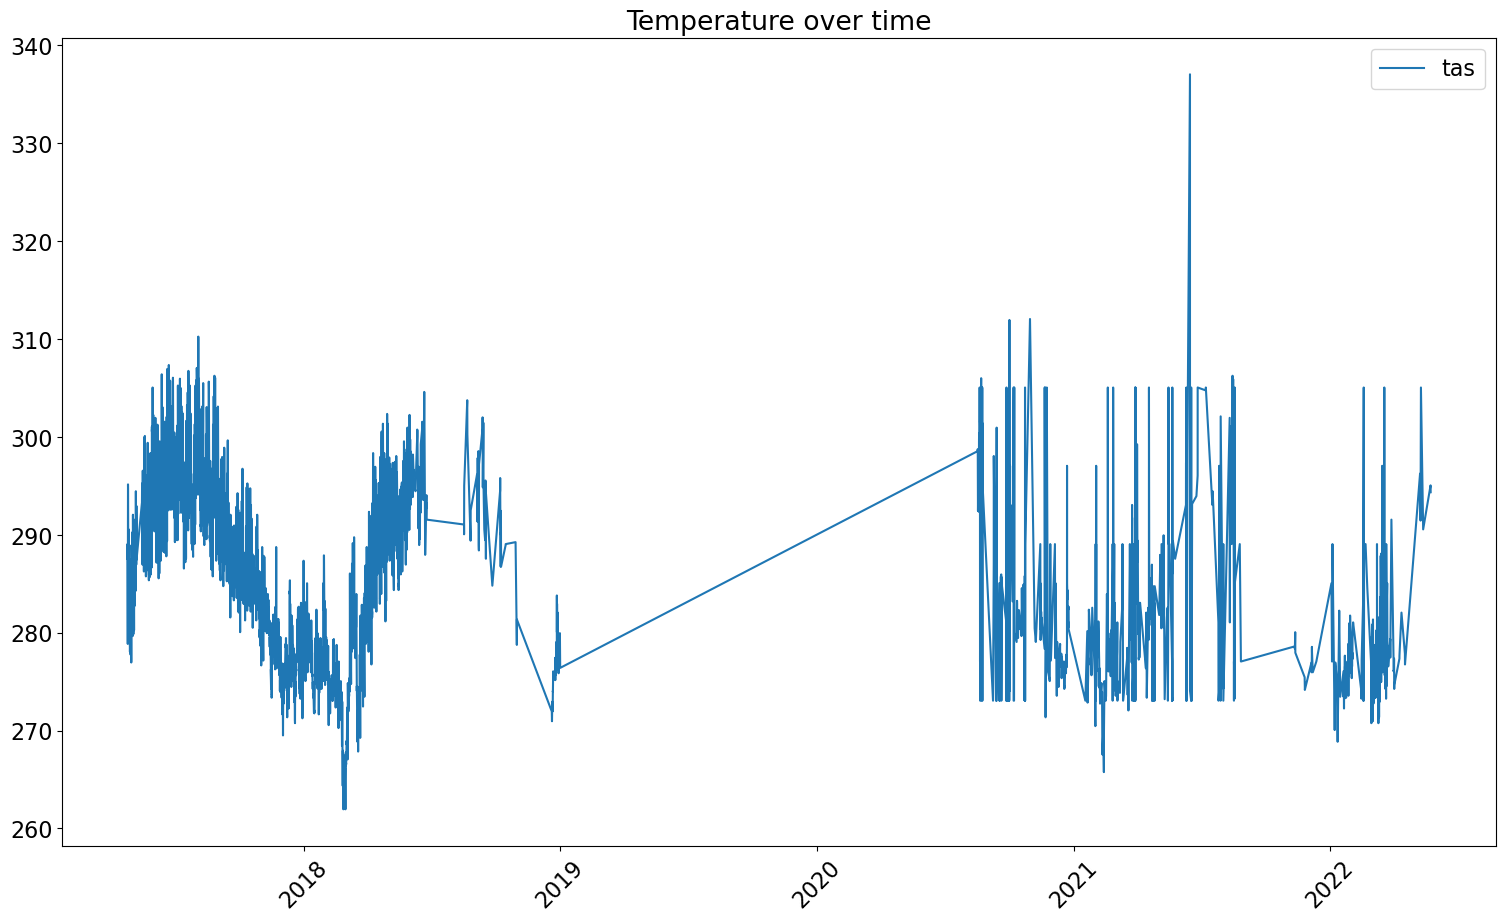

In [4]:
station_submission = DataSubmission(name=station_name, mask_years=mask_years)
station_submission.measurement_dir_path = measurements_folder

station_submission.initialize_station()
plot_measurements_df(station_submission.station.df)

In [5]:
training = TrainingExecuter(
    station = station_submission.station,
    progress = station_submission.progress,
    iterations = iterations,
    local = True,
)
job_id = training.execute_with_sbatch()

(11632,)
Saving to ./executed_trainings/Vienna_mask-2019_20240506-1606/target_uil_7y5w/train/vienna_mask-2019.nc
Downloading... 0.0


2024-05-06 16:06:14,834 INFO Welcome to the CDS
2024-05-06 16:06:14,835 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-06 16:06:14,972 INFO Request is completed
2024-05-06 16:06:14,973 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data0/adaptor.mars.internal-1714999887.5923784-28600-1-5ca84b42-9752-4fa8-9dda-7b660f45f6ec.grib to /tmp/tmphv5icqqk/2017_4-12.grib (1.7M)
2024-05-06 16:06:15,679 INFO Download rate 2.4M/s  
2024-05-06 16:06:15,786 INFO Welcome to the CDS
2024-05-06 16:06:15,786 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-06 16:06:15,889 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data1/adaptor.mars.internal-1714953694.7750046-22516-7-a54d03e3-a46f-432d-8801-e9d00e460a8b.grib to /tmp/tmphv5icqqk/2018.grib (2.3M)


Downloading... 20.0


2024-05-06 16:06:16,375 INFO Download rate 4.6M/s  
2024-05-06 16:06:16,479 INFO Welcome to the CDS
2024-05-06 16:06:16,480 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-06 16:06:16,612 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data3/adaptor.mars.internal-1714954194.5894334-25810-14-a7ec2448-4ca2-4236-a347-4dd37440a56c.grib to /tmp/tmphv5icqqk/2020_8-12.grib (968.2K)


Downloading... 40.0


2024-05-06 16:06:17,113 INFO Download rate 1.9M/s 
2024-05-06 16:06:17,217 INFO Welcome to the CDS
2024-05-06 16:06:17,217 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


Downloading... 60.0


2024-05-06 16:06:17,443 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data6/adaptor.mars.internal-1714954453.8817785-9518-1-4b099575-d4da-4340-b991-79cd2d62930e.grib to /tmp/tmphv5icqqk/2021.grib (2.3M)
2024-05-06 16:06:17,959 INFO Download rate 4.4M/s   
2024-05-06 16:06:18,065 INFO Welcome to the CDS
2024-05-06 16:06:18,066 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-06 16:06:18,182 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data4/adaptor.mars.internal-1714954833.4718668-22668-6-837fd1e3-853f-4b45-98d7-f6ad60f4f089.grib to /tmp/tmphv5icqqk/2022_1-5.grib (955.5K)


Downloading... 80.0


2024-05-06 16:06:18,723 INFO Download rate 1.7M/s 


Found 2021.grib
Renamed variable var167 to tas in /tmp/tmpj9npzk7i/2021.nc
Found 2022_1-5.grib
Renamed variable var167 to tas in /tmp/tmpj9npzk7i/2022_1-5.nc
Found 2020_8-12.grib
Renamed variable var167 to tas in /tmp/tmpj9npzk7i/2020_8-12.nc
Found 2018.grib
Renamed variable var167 to tas in /tmp/tmpj9npzk7i/2018.nc
Found 2017_4-12.grib
Renamed variable var167 to tas in /tmp/tmpj9npzk7i/2017_4-12.nc
Found 2018.nc
Found 2022_1-5.nc
Found 2017_4-12.nc
Found 2020_8-12.nc
Found 2021.nc
Merged era5 file saved into ./executed_trainings/Vienna_mask-2019_20240506-1606/temp_o61pgw_u/era5_merged.nc
Lat:  48.2303
Lon:  16.3609
nearest_lat_idx: 5 [49.231    48.980875 48.73075  48.480625 48.2305   47.980375 47.73025
 47.480125 47.23    ]
nearest_lon_idx: 5 [15.36 15.61 15.86 16.11 16.36 16.61 16.86 17.11 17.36]
nearest_lat: 47.980375
nearest_lon: 16.61
nearest lon is bigger
nearest lat is smaller
crop_lon_idx_min: 1
crop_lon_idx_max: 8
crop_lat_idx_min: 1
crop_lat_idx_max: 8
Lon values after croppi

In [6]:
print(f"Job ID: {job_id}")
print(f"tail -f {training.temp_dir.name}/slurm_logs/crai_crai-train_{job_id}.log")

Job ID: 10187821
tail -f ./executed_trainings/Vienna_mask-2019_20240506-1606/temp_o61pgw_u/slurm_logs/crai_crai-train_10187821.log
